# Pair Programming EDA

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

Objetivos: 

- Buscar un conjunto de datos a analizar
- Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.
- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado.
- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.
- Interpretación de los resultados.

Happy coding 📊📈📉

In [2]:
# este df contiene los datos de una empresa que concede préstamos hipotecários en función de ciertos requisitos

df = pd.read_csv("../regresion_logistica/ficheros/loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Columnas:

Loan_ID: Unique Loan ID

Gender:	Male/ Female

Married: Applicant married (Y/N)

Dependents:	Number of dependents

Education:	Applicant Education (Graduate/ Under Graduate)

Self_Employed:	Self-employed (Y/N)

ApplicantIncome: Applicant income

CoapplicantIncome: Coapplicant income

LoanAmount:	Loan amount in thousands

Loan_Amount_Term: Term of a loan in months

Credit_History:	credit history meets guidelines - si cumple el historial crediticio conforme a las directrices

Property_Area: Urban/ Semi-Urban/ Rural

Loan_Status:	Loan approved (Y/N)

## Variable respuesta: *loan_status*

### Análisis exploratorio de los datos:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [5]:
df.describe(include="object").T

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [6]:
df.duplicated().sum()

0

### Conocemos los valores únicos de las columnas aparentemente más interesantes:

In [7]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [11]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [13]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [14]:
# antes de continuar cambiamos los nombres de las columnas

nuevas_col = {col:col.lower() for col in df.columns}
df.rename(columns=nuevas_col, inplace = True)

### Analizamos los nulos en cada caso:

In [15]:
df.isnull().sum()/df.shape[0]

loan_id              0.000000
gender               0.021173
married              0.004886
dependents           0.024430
education            0.000000
self_employed        0.052117
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           0.035831
loan_amount_term     0.022801
credit_history       0.081433
property_area        0.000000
loan_status          0.000000
dtype: float64

In [16]:
# para las columnas gender, married, sef_employed, dependents y credit_history borramos los nulos

df.dropna(subset = ["gender", "married", "self_employed", "dependents", "credit_history"], axis = 0 , inplace= True)

In [17]:
# conocemos los estadisticos para la columna loan_amount_term

print(df["loan_amount_term"].mean())
print(df["loan_amount_term"].median())
print(df["loan_amount_term"].mode())

342.0120240480962
360.0
0    360.0
Name: loan_amount_term, dtype: float64


In [18]:
#sustituimos por la mediana

df["loan_amount_term"].fillna(df["loan_amount_term"].median(), inplace = True)

In [19]:
# conocemos los estadisticos para la columna loan_amount

print(df["loanamount"].mean())
print(df["loanamount"].median())
print(df["loanamount"].mode())

144.1361788617886
128.0
0    120.0
Name: loanamount, dtype: float64


In [20]:
#sustituimos por la mediana

df["loanamount"].fillna(df["loanamount"].median(), inplace = True)

In [21]:
df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

### Gestionamos los outliers:

In [22]:
numericas = df.select_dtypes(include=np.number)
numericas.head(2)

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0


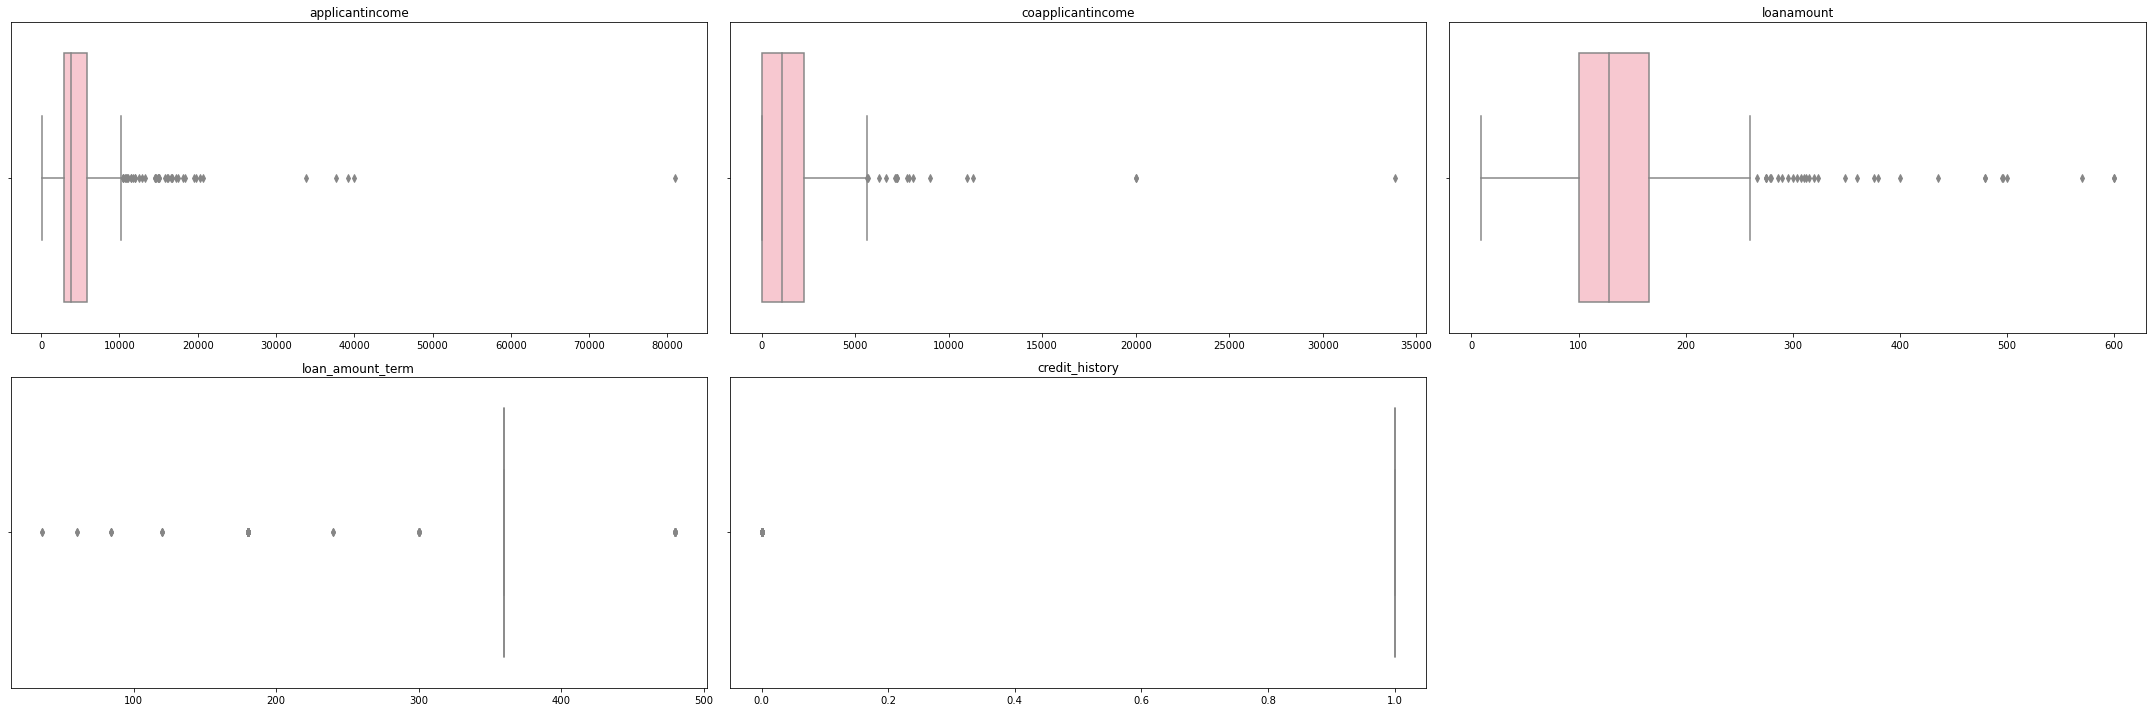

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(30,10))

axes = axes.flat

for indice, cate in enumerate(numericas.columns):

    sns.boxplot(x = df[cate], data = df, ax=axes[indice], color = "pink"); 

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.delaxes(axes[-1])
fig.tight_layout();

A simple vista vemos que los coaplicants tienen menos ingresos que los aplicants. La mediana del *loan_amount_term* está un poco por debajo de los 400.  Observamos una tendencia que nos indica que a mayor ingreso, más alta es la cantidad solicitada. Comprobamos esta teoría con otras gráficas.

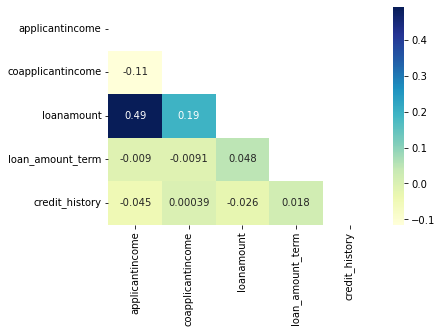

In [24]:
mask = np.triu(np.ones_like(numericas.corr(), dtype=np.bool))

sns.heatmap(numericas.corr(), 
            cmap = "YlGnBu", 
           annot = True, 
           mask = mask); 

Vemos que hay muy poca correlación entre los aplicantes y los coaplicantes y entre ellos y la cantidad pedida.

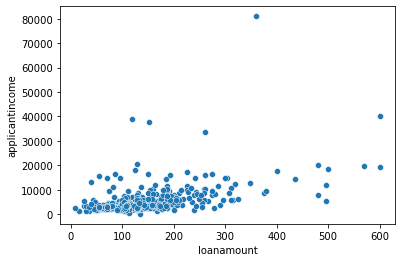

In [25]:
sns.scatterplot(data=numericas, x = "loanamount", y = "applicantincome") ;

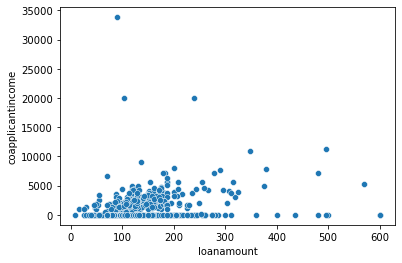

In [26]:
sns.scatterplot(data=numericas, x = "loanamount", y = "coapplicantincome") ;

Confirmamos que la relación entre la cantidad y el ingreso de los aplicantes y coaplicantes no existe a penas, ya que los salarios más altos no se corresonden con las cantidades pedidas más altas. Visto esto, hemos decidido quedarnos con los datos de aquellos aplicantes con un salario menor a 20000.

In [27]:
df_mayores = df[df["applicantincome"] > 20000]

In [28]:
df_mayores["applicantincome"].min()

20233

In [29]:
# guardamos el df de mayores para hacer un modelo a parte en otro momento.

df_mayores.to_csv("../regresion_logistica/ficheros/income_mayores20000.csv")

In [30]:
df_menores = df[df["applicantincome"] <= 20000]

### Examinamos los tipos de datos solo para *df_menores* y seguimos limpiando:

In [31]:
df_menores.dtypes

loan_id               object
gender                object
married               object
dependents            object
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

In [32]:
# cambiamos el tipo de dato

columnas_categoria = ["gender", "married", "dependents", "education", "self_employed", "property_area", "loan_status"]

for i in columnas_categoria:
    df_menores[i] = df_menores[i].astype("category")

In [33]:
# eliminamos la columna loan_id ya que no es necesaria para el modelo

df_menores.drop("loan_id", axis=1, inplace = True)

In [34]:
df_menores.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
df_menores["education"].value_counts()

Graduate        394
Not Graduate    110
Name: education, dtype: int64

In [36]:
df_menores["property_area"].value_counts()

Semiurban    193
Urban        165
Rural        146
Name: property_area, dtype: int64

In [37]:
df_menores["loan_status"].value_counts()

Y    344
N    160
Name: loan_status, dtype: int64

In [38]:
# agrupamos la columna loan_amount_term en 3 categorías

df_menores["loan_amount_term"].value_counts()

360.0    434
180.0     37
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: loan_amount_term, dtype: int64

In [39]:
df_menores["loan_plazo"] = pd.cut(df_menores["loan_amount_term"], bins = [35.0, 85.0, 239.0, 481.0], labels= ["corto", "medio", "largo"]) 

In [40]:
df_menores["loan_plazo"].isnull().sum()

0

In [41]:
df_menores.drop("loan_amount_term", axis=1, inplace=True)

In [42]:
df_menores["dependents"].unique()

['0', '1', '2', '3+']
Categories (4, object): ['0', '1', '2', '3+']

In [43]:
# quitamos el simbolo + al 3

def sustituir(col):
    for i in col:
        return i.replace("3+","3")

In [44]:
df_menores["dependents"] = df_menores["dependents"].apply(sustituir)

In [45]:
df_menores.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,credit_history,property_area,loan_status,loan_plazo
0,Male,No,0,Graduate,No,5849,0.0,128.0,1.0,Urban,Y,largo
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N,largo
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y,largo
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y,largo
4,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y,largo


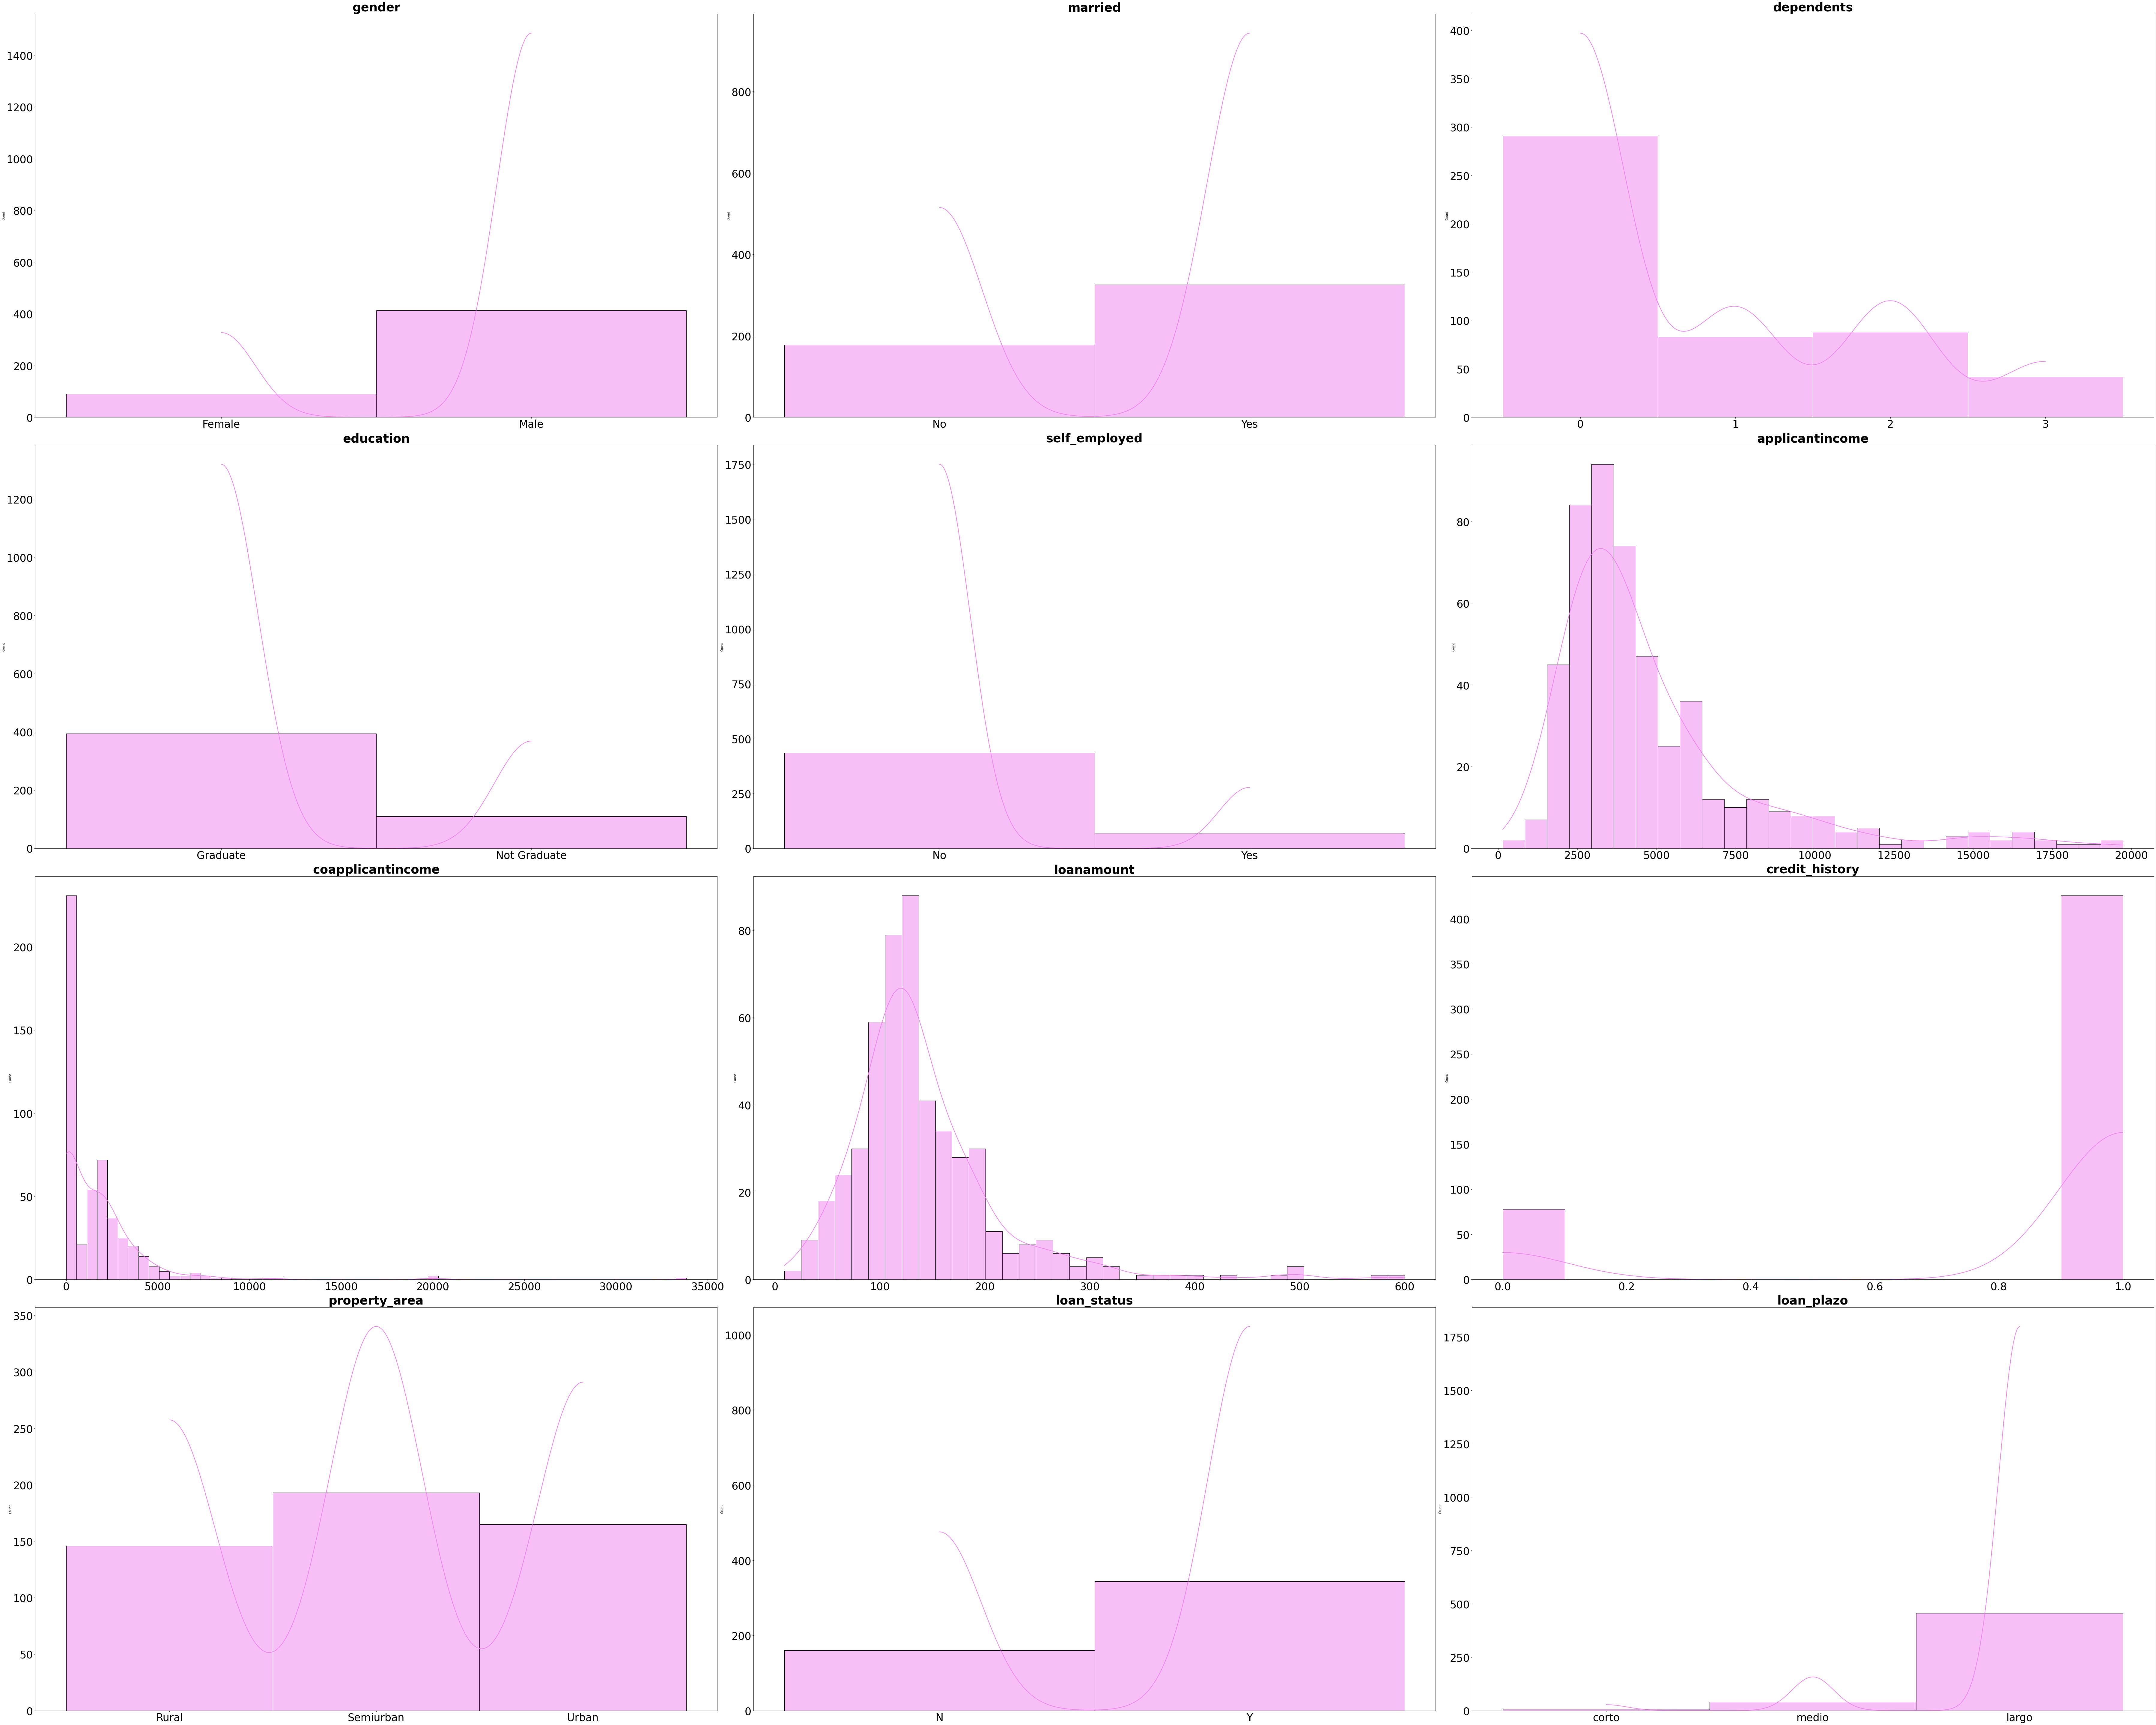

In [46]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (100, 80))
axes = axes.flat
for i, colum in enumerate(df_menores.columns): 
    sns.histplot(
        data = df_menores[colum],
        kde = True,
        color = "violet", 
        line_kws = {"linewidth": 2}, 
        alpha = 0.5,
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 40, fontweight = "bold")
    axes[i].tick_params(labelsize = 35)
    axes[i].set_xlabel("")

fig.tight_layout();

### Vemos algunos detalles más en profundidad:

In [47]:
print(df_menores["loanamount"].max())
print(df_menores["loanamount"].min())

600.0
9.0


In [48]:
df_menores[(df_menores["loanamount"] == 600.0)]

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,credit_history,property_area,loan_status,loan_plazo
561,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,1.0,Semiurban,Y,largo


In [49]:
df_menores[(df_menores["loanamount"] == 9.0)]

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,credit_history,property_area,loan_status,loan_plazo
568,Female,No,0,Graduate,No,2378,0.0,9.0,1.0,Urban,N,largo


Tanto el préstamo más alto como el más bajo, fueron solicitados por mujeres con estudios. 

El más alto se aprobó para el área semiurbana y la mujer estaba casada. El más bajo fue denegado para una mujer soltera para el área urbana.

Tras la exploración de los datos concluimos lo siguiente:

- se conceden más préstamos de los que se deniegan
- se conceden más préstamos a largo plazo
- las hipotecas se solicitan más para las zonas semiurbanas
- hay más cantidad de personas que se ajustan a las condiciones hipotecarias
- según nuestros datos, las características de los applicants con más préstamos concedidos son: hombre, con estudios, casado, trabajador por cuenta ajena y sin hijos

In [50]:
df_menores.to_csv("../regresion_logistica/ficheros/loan_limpio_menores.csv", index=False)